In [2]:
!pip install nltk scikit-learn pandas numpy matplotlib seaborn


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
data = pd.read_csv(url)

data.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+|#", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

data['clean_tweet'] = data['tweet'].apply(clean_text)
data.head()


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [8]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+|#", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

data['clean_tweet'] = data['tweet'].apply(clean_text)
data.head()


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [10]:
X = data['clean_tweet']
y = data['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [13]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9504145158767402
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.92      0.34      0.49       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.73      6393
weighted avg       0.95      0.95      0.94      6393



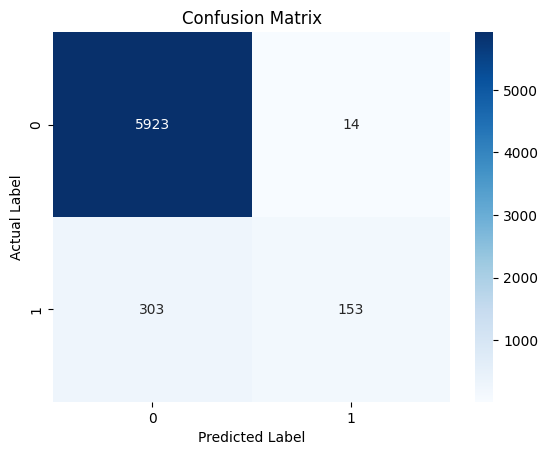

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


In [15]:
def predict_sentiment(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    result = model.predict(vector)
    return "Positive 😊" if result[0] == 1 else "Negative 😠"


In [16]:
predict_sentiment("I really love this project, it's amazing!")


'Negative 😠'

In [17]:
clean_text("I really love this project, it's amazing!")


'really love project amazing'

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [19]:
predict_sentiment("I really love this project, it's amazing!")


'Negative 😠'

In [20]:
!pip install transformers torch


In [21]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [22]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [23]:
def bert_predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    return "Positive 😊" if predicted_class == 1 else "Negative 😠"


In [24]:
bert_predict_sentiment("I really love this project, it's amazing!")


'Positive 😊'

In [25]:
bert_predict_sentiment("This is the worst experience ever")
bert_predict_sentiment("I hate this product")
bert_predict_sentiment("Not bad, could be better")
bert_predict_sentiment("Absolutely fantastic work!")


'Positive 😊'

In [26]:
print(bert_predict_sentiment("This is the worst experience ever"))
print(bert_predict_sentiment("I hate this product"))
print(bert_predict_sentiment("Not bad, could be better"))
print(bert_predict_sentiment("Absolutely fantastic work!"))


Negative 😠
Negative 😠
Positive 😊
Positive 😊


In [27]:
!pip install langdetect sentencepiece


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=ce9a92608cbc8fe1907465ddc75df30cf60baa1d6c5d7e2e7936bd980dc38827
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [28]:
from langdetect import detect
from transformers import MarianMTModel, MarianTokenizer


In [29]:
translator_model_name = "Helsinki-NLP/opus-mt-mul-en"

translator_tokenizer = MarianTokenizer.from_pretrained(translator_model_name)
translator_model = MarianMTModel.from_pretrained(translator_model_name)


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/707k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/791k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/310M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/310M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [30]:
def translate_to_english(text):
    inputs = translator_tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    translated = translator_model.generate(**inputs)

    english_text = translator_tokenizer.decode(translated[0], skip_special_tokens=True)
    return english_text


In [31]:
def multilingual_sentiment(text):
    try:
        lang = detect(text)
    except:
        lang = "unknown"

    # If not English, translate
    if lang != "en":
        translated_text = translate_to_english(text)
    else:
        translated_text = text

    sentiment = bert_predict_sentiment(translated_text)

    return {
        "original_text": text,
        "detected_language": lang,
        "translated_text": translated_text,
        "sentiment": sentiment
    }


In [32]:
multilingual_sentiment("I really love this project")


{'original_text': 'I really love this project',
 'detected_language': 'en',
 'translated_text': 'I really love this project',
 'sentiment': 'Positive 😊'}

In [33]:
multilingual_sentiment("ഈ പ്രോജക്ട് വളരെ നല്ലതാണ്")


{'original_text': 'ഈ പ്രോജക്ട് വളരെ നല്ലതാണ്',
 'detected_language': 'ml',
 'translated_text': 'This project is very good.',
 'sentiment': 'Positive 😊'}

In [34]:
multilingual_sentiment("यह अनुभव बहुत खराब था")


{'original_text': 'यह अनुभव बहुत खराब था',
 'detected_language': 'hi',
 'translated_text': 'It was a very bad experience.',
 'sentiment': 'Negative 😠'}

In [35]:
multilingual_sentiment("இந்த செயலி அருமையாக உள்ளது")


{'original_text': 'இந்த செயலி அருமையாக உள்ளது',
 'detected_language': 'ta',
 'translated_text': 'This action is useful',
 'sentiment': 'Positive 😊'}

In [36]:
multilingual_sentiment("இந்த சேவை மிகவும் மோசமாக உள்ளது")


{'original_text': 'இந்த சேவை மிகவும் மோசமாக உள்ளது',
 'detected_language': 'ta',
 'translated_text': 'This service is very bad',
 'sentiment': 'Negative 😠'}

In [37]:
multilingual_sentiment("ഈ അനുഭവം തീരെ മോശമായിരുന്നു")


{'original_text': 'ഈ അനുഭവം തീരെ മോശമായിരുന്നു',
 'detected_language': 'ml',
 'translated_text': 'This experience was very bad.',
 'sentiment': 'Negative 😠'}

In [38]:
multilingual_sentiment("ఈ యాప్ చాలా ఉపయోగకరంగా ఉంది")


{'original_text': 'ఈ యాప్ చాలా ఉపయోగకరంగా ఉంది',
 'detected_language': 'te',
 'translated_text': 'This app is very useful',
 'sentiment': 'Positive 😊'}

In [39]:
multilingual_sentiment("Cette application est vraiment géniale")


{'original_text': 'Cette application est vraiment géniale',
 'detected_language': 'fr',
 'translated_text': 'This application is really great',
 'sentiment': 'Positive 😊'}

In [40]:
multilingual_sentiment("Esta aplicación es terrible")


{'original_text': 'Esta aplicación es terrible',
 'detected_language': 'es',
 'translated_text': 'This application is not supposed to be called',
 'sentiment': 'Negative 😠'}

In [41]:
multilingual_sentiment("Diese App ist sehr nützlich")


{'original_text': 'Diese App ist sehr nützlich',
 'detected_language': 'de',
 'translated_text': 'This app is very useful',
 'sentiment': 'Positive 😊'}

In [42]:
multilingual_sentiment("このアプリは最悪です")


{'original_text': 'このアプリは最悪です',
 'detected_language': 'ja',
 'translated_text': "This is the worst thing I've ever done.",
 'sentiment': 'Negative 😠'}

In [43]:
multilingual_sentiment("이 앱은 정말 좋아요")


{'original_text': '이 앱은 정말 좋아요',
 'detected_language': 'ko',
 'translated_text': 'Whoa, whoa, whoa, whoa, whoa.',
 'sentiment': 'Negative 😠'}